In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import os
import math

# 원주율 생성
PI = 3.141592

%matplotlib inline

In [7]:
readfile = []
each_train_set = []
class_train_set = []
all_train_set = []

# names : training한 사람 이름, classnames : 동작 이름
names = ['anton', 'rimy', 'wille', 'yahwang']
classnames = ['HUM', 'LIGHT', 'OFF', 'ON', 'ONE', 'PHONE', 'TWO']

# names와 classname만큼, traindata 각 40개 만큼 돌면서 각 파일들의 좌표를 읽어들여 최종적으로 all_train_set에 모은다.
for name in names :
    class_train_set = []
    for classname in classnames :
        each_train_set = []
        for filenumber in range(40) :
            f = open("/home/pirl/smart_switch/Train_data/%s/%s/coord/%d.txt"%(name,classname,filenumber))
            each_train = []
            i = 0
            for file in f :
                if file != "\n" :
                    readfile.append(file)
                    readfile[i] = readfile[i][:-1].split()
                    readfile[i][0] = float(readfile[i][0])
                    readfile[i][1] = float(readfile[i][1])
                    i += 1
                else :
                    each_train.append(readfile)
                    readfile = []
                    i = 0
            f.close()
            each_train = np.array(each_train)
            each_train_set.append(each_train)
        class_train_set.append(each_train_set)
        
    all_train_set.append(class_train_set)
    
print(np.asarray(each_train).shape)    
print(np.asarray(each_train_set).shape)
print(np.asarray(class_train_set).shape)
print(np.asarray(all_train_set).shape)

(46, 21, 2)
(40, 46, 21, 2)
(7, 40, 46, 21, 2)
(4, 7, 40, 46, 21, 2)


In [3]:
def regularization(x_data):

    X = np.hsplit(x_data, 2)[0]
    Y = np.hsplit(x_data, 2)[1]
    
    # 본래 정규화를 하는 과정이 있었는데, 학습 결과가 좋지 않으므로 배제하였다.
    '''
    #평행이동
    c1x = (np.max(X)+np.min(X))/2
    c1y = (np.max(Y)+np.min(Y))/2
    c2x, c2y = 128, 128
    X += c2x-c1x
    Y += c2y-c1y
    
    #확대
    k1 = max(np.max(X)-np.min(X), np.max(Y)-np.min(Y))
    k2 = 25
    ratio = k2/k1
    X += (X-c2x) * ratio
    Y += (Y-c2y) * ratio
    '''
    x_data = np.concatenate((X,Y),1)
    return x_data

In [4]:
# plot_hand를 하는 함수이다. 기본적으로 본 프로젝트에서 사용한 손 뼈대 인식 오픈소스를 기반으로 작성했다.
# t1~t10은 2개씩 짝지어서 각 손가락을 나타낸다.
# 주석처리한 부분을 해제하면 함수 호출 때마다 손 모양 그래프를 그려볼 수 있다.

def plot_hand(x_data) :
    X = np.hsplit(x_data, 2)[0]
    Y = np.hsplit(x_data, 2)[1]
    t1 = np.array((X[0],X[17],X[18],X[19],X[20]))
    t2 = np.array((Y[0],Y[17],Y[18],Y[19],Y[20]))
    t3 = np.array((X[0],X[13],X[14],X[15],X[16]))
    t4 = np.array((Y[0],Y[13],Y[14],Y[15],Y[16]))
    t5 = np.array((X[0],X[9],X[10],X[11],X[12])) 
    t6 = np.array((Y[0],Y[9],Y[10],Y[11],Y[12]))
    t7 = np.array((X[0],X[5],X[6],X[7],X[8]))
    t8 = np.array((Y[0],Y[5],Y[6],Y[7],Y[8]))
    t9 = np.array((X[0],X[1],X[2],X[3],X[4]))
    t10 = np.array((Y[0],Y[1],Y[2],Y[3],Y[4]))
    '''
    fig = plt.figure(figsize=(5,5))
    plot1 = fig.add_subplot(111)
    plot1.set_xlim(0,256)
    plot1.set_ylim(0,256)
    plot1.plot(t1,t2)
    plot1.plot(t3,t4)
    plot1.plot(t5,t6)
    plot1.plot(t7,t8)
    plot1.plot(t9,t10)
    plt.show()
    '''

<img src=/home/pirl/Desktop/default_coordination.png>

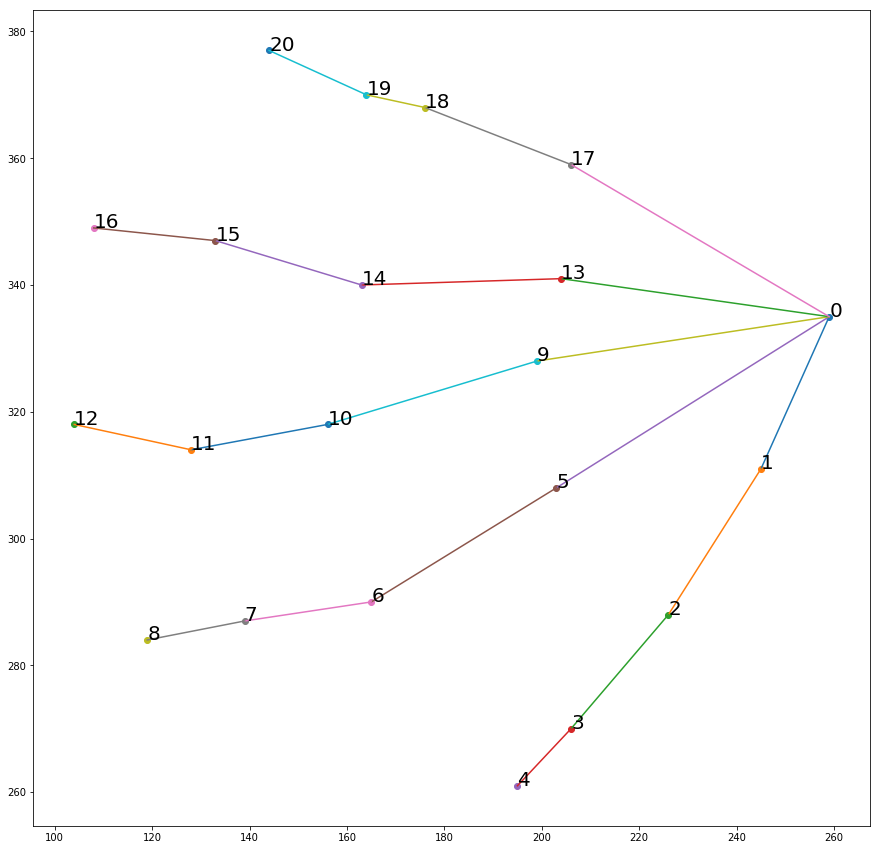

In [19]:
from IPython.display import Image
Image("/home/pirl/Desktop/default_coordination.png", width = 500, height = 500)

In [5]:
# -25도~+25도로 회전시키는 함수이다. 원 데이터와 각도를 매개변수로 받아와서 x좌표와 y좌표로 나눈 다음, 보고서의 공식대로 좌표를 회전시킨다.

def rotation(rotdata, angle):
    X = np.hsplit(rotdata, 2)[0]
    Y = np.hsplit(rotdata, 2)[1]
    ox = (np.max(X)+np.min(X))/2
    oy = (np.max(Y)+np.min(Y))/2
    rotresult = []
    for i in range(len(rotdata)) :
        px, py = X[i], Y[i]
        qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
        qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
        rotresult.append(np.concatenate((qx, qy)))
    return np.array(rotresult)

In [6]:
# 각각의 사람-각각의 동작 폴더마다 for문을 50번만큼 돌면서 rotation된 좌표들을 출력한다. 

for i, name in enumerate(names) :
    for j, classname in enumerate(classnames) :
        for k in range(40) :
            for l in range(50) :
                f = open("/home/pirl/smart_switch/Train_data/%s/%s/coord/%d_%d.txt"%(name,classname,k,l), "w")
                for n in range(46) :
                    regularized = regularization(all_train_set[i][j][k][n])
                    plot_hand(regularized)
                    rot_coord = rotation(regularized, (PI/180)*(l-25))
                    for m in range(len(rot_coord)) :
                        f.write("%.3f %.3f\n"%(rot_coord[m][0], rot_coord[m][1]))
                    f.write("\n")                    
                f.close()
        print("클래스 1개 완료")
    print("사람 1명 완료")
        

클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
사람 1명 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
사람 1명 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
사람 1명 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
클래스 1개 완료
사람 1명 완료
